# Burn Area Index <img align="right" src="image/gistda.png" width="200" height="200">

In this case study, we will analyze a wildfire event that occurred in Phu Kradueng National Park on 17th February 2020. 

Our objective is to compare the conditions before and after the wildfire incident.
Through this study, we aim to gain insights into the scale of the wildfire and its consequences, which can aid in environmental monitoring, land management, and the development of strategies to mitigate the impact of future wildfire events in the region.

<table class="ee-notebook-buttons" align="left">
    <td><a target="_parent"  href="https://nbviewer.org/github/DreamPTK/rice-detection/blob/main/Tutorial/Burn_area.ipynb"><img width=26px src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/38/Jupyter_logo.svg/883px-Jupyter_logo.svg.png" />Notebook Viewer</a></td>
</table>

## Load Package

In [1]:
%matplotlib inline

import datacube
import matplotlib.pyplot as plt
from dream_river.indices import cal_index
from dream_river.plotimg import rgb

## Conect to datacube

In [2]:
# connect to datacube
dc = datacube.Datacube(app='Burn_area')

## Set Parameter

#### - Before

In [3]:
# before wildfire
query_previous = {"product": "ls8_collections_sr_scene",
         "measurements": ['blue','green','red',"nir"],
         "y": (16.850, 16.938),
         "x": (101.694, 101.820),
         "time": ("2020-02-01","2020-02-15"),
         "resolution": (-30,30),
         "output_crs": "EPSG:32647"
        }

#### - After

In [4]:
# after wildfire
query_after = {"product": "ls8_collections_sr_scene",
         "measurements": ['blue','green','red',"nir"],
         "y": (16.850, 16.938),
         "x": (101.694, 101.820),
         "time": ("2020-02-15","2020-02-28"),
         "resolution": (-30,30),
         "output_crs": "EPSG:32647"
        }

## Load dataset from datacube

#### Before

In [5]:
# Loading data using dc.load()
ds = dc.load(**query_previous)
ds

<xarray.Dataset>
Dimensions:      (time: 1, y: 332, x: 453)
Coordinates:
  * time         (time) datetime64[ns] 2020-02-03T03:37:02
  * y            (y) float64 1.875e+06 1.875e+06 ... 1.865e+06 1.865e+06
  * x            (x) float64 7.869e+05 7.87e+05 7.87e+05 ... 8.005e+05 8.005e+05
    spatial_ref  int32 32647
Data variables:
    blue         (time, y, x) int16 369 362 330 323 330 ... 660 676 664 671 640
    green        (time, y, x) int16 573 545 517 508 520 ... 1020 1016 1029 1002
    red          (time, y, x) int16 564 551 451 445 477 ... 1366 1340 1351 1313
    nir          (time, y, x) int16 1619 1637 1616 1628 ... 2537 2448 2439 2474
Attributes:
    crs:           EPSG:32647
    grid_mapping:  spatial_ref

#### After

In [6]:
# Loading data using dc.load()
ds_after = dc.load(**query_after)
ds_after

<xarray.Dataset>
Dimensions:      (time: 1, y: 332, x: 453)
Coordinates:
  * time         (time) datetime64[ns] 2020-02-19T03:36:59
  * y            (y) float64 1.875e+06 1.875e+06 ... 1.865e+06 1.865e+06
  * x            (x) float64 7.869e+05 7.87e+05 7.87e+05 ... 8.005e+05 8.005e+05
    spatial_ref  int32 32647
Data variables:
    blue         (time, y, x) int16 381 374 340 321 329 ... 542 564 576 565 548
    green        (time, y, x) int16 591 581 574 595 607 ... 874 895 892 868 854
    red          (time, y, x) int16 569 611 560 589 626 ... 1129 1092 1041 1012
    nir          (time, y, x) int16 1961 1704 1785 1830 ... 1981 1870 1699 1694
Attributes:
    crs:           EPSG:32647
    grid_mapping:  spatial_ref

## Explore the study area

#### Before

the image is on 3 February 2020.

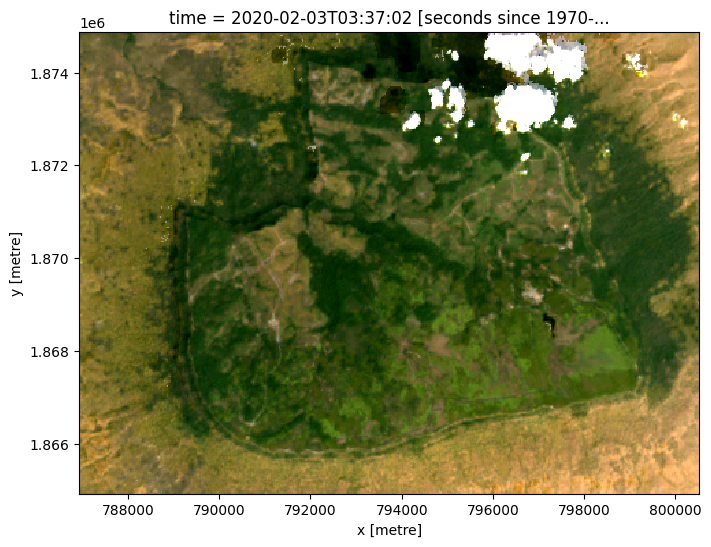

In [7]:
# Plot as an RGB image select first timestep 
rgb(ds, bands=['red','green', 'blue'], index=[0])

#### After

the image is on 19 February 2020. (after wildfire)

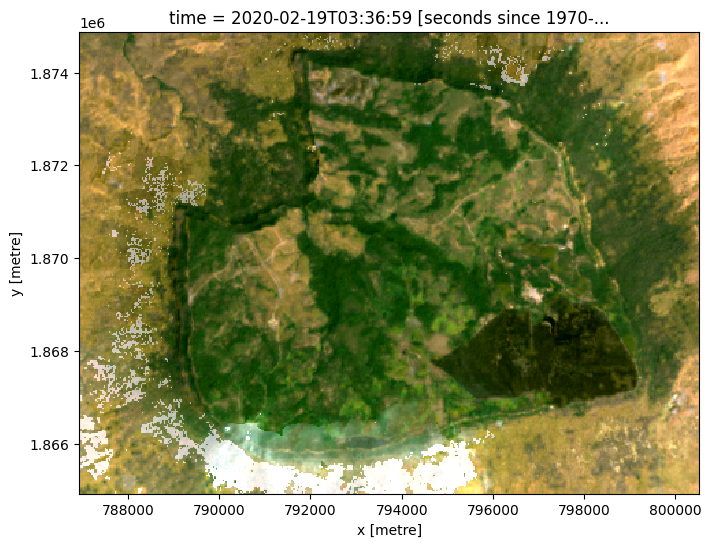

In [8]:
# Plot as an RGB image select first timestep 
rgb(ds_after, bands=['red','green', 'blue'], index=[0])

You can see the differance of two images.

## Calculate BAI Index

The Burn Area Index (BAI) uses the reflectance values in the red and NIR portion of the spectrum to identify the areas of the terrain affected by fire.

#### Before

In [9]:
# Calculate indices 
ds_index = cal_index(ds, 
                    index=['BAI'],  
                    collection='ls8_collections_sr_scene')
# explore data
ds_index

<xarray.Dataset>
Dimensions:      (time: 1, y: 332, x: 453)
Coordinates:
  * time         (time) datetime64[ns] 2020-02-03T03:37:02
  * y            (y) float64 1.875e+06 1.875e+06 ... 1.865e+06 1.865e+06
  * x            (x) float64 7.869e+05 7.87e+05 7.87e+05 ... 8.005e+05 8.005e+05
    spatial_ref  int32 32647
Data variables:
    blue         (time, y, x) int16 369 362 330 323 330 ... 660 676 664 671 640
    green        (time, y, x) int16 573 545 517 508 520 ... 1020 1016 1029 1002
    red          (time, y, x) int16 564 551 451 445 477 ... 1366 1340 1351 1313
    nir          (time, y, x) int16 1619 1637 1616 1628 ... 2537 2448 2439 2474
    BAI          (time, y, x) float64 81.4 78.31 74.98 ... 28.32 28.53 27.7
Attributes:
    crs:           EPSG:32647
    grid_mapping:  spatial_ref

In [10]:
# select time step 1 that time = 0 ([0,1,2,...])
ds_time = ds_index.isel(time = 0)

# explore data
ds_time

<xarray.Dataset>
Dimensions:      (y: 332, x: 453)
Coordinates:
    time         datetime64[ns] 2020-02-03T03:37:02
  * y            (y) float64 1.875e+06 1.875e+06 ... 1.865e+06 1.865e+06
  * x            (x) float64 7.869e+05 7.87e+05 7.87e+05 ... 8.005e+05 8.005e+05
    spatial_ref  int32 32647
Data variables:
    blue         (y, x) int16 369 362 330 323 330 325 ... 660 676 664 671 640
    green        (y, x) int16 573 545 517 508 520 ... 1023 1020 1016 1029 1002
    red          (y, x) int16 564 551 451 445 477 ... 1344 1366 1340 1351 1313
    nir          (y, x) int16 1619 1637 1616 1628 1577 ... 2537 2448 2439 2474
    BAI          (y, x) float64 81.4 78.31 74.98 73.27 ... 28.32 28.53 27.7
Attributes:
    crs:           EPSG:32647
    grid_mapping:  spatial_ref

#### After

In [11]:
# Calculate indices 
ds_BAI = cal_index(ds_after, 
                    index=['BAI'],  
                    collection='ls8_collections_sr_scene')
# explore data
ds_BAI

<xarray.Dataset>
Dimensions:      (time: 1, y: 332, x: 453)
Coordinates:
  * time         (time) datetime64[ns] 2020-02-19T03:36:59
  * y            (y) float64 1.875e+06 1.875e+06 ... 1.865e+06 1.865e+06
  * x            (x) float64 7.869e+05 7.87e+05 7.87e+05 ... 8.005e+05 8.005e+05
    spatial_ref  int32 32647
Data variables:
    blue         (time, y, x) int16 381 374 340 321 329 ... 542 564 576 565 548
    green        (time, y, x) int16 591 581 574 595 607 ... 874 895 892 868 854
    red          (time, y, x) int16 569 611 560 589 626 ... 1129 1092 1041 1012
    nir          (time, y, x) int16 1961 1704 1785 1830 ... 1981 1870 1699 1694
    BAI          (time, y, x) float64 49.07 72.99 62.59 ... 61.68 82.68 83.54
Attributes:
    crs:           EPSG:32647
    grid_mapping:  spatial_ref

In [12]:
# select time step 1 that time = 0 ([0,1,2,...])
ds_post = ds_BAI.isel(time = 0)

# explore data
ds_post

<xarray.Dataset>
Dimensions:      (y: 332, x: 453)
Coordinates:
    time         datetime64[ns] 2020-02-19T03:36:59
  * y            (y) float64 1.875e+06 1.875e+06 ... 1.865e+06 1.865e+06
  * x            (x) float64 7.869e+05 7.87e+05 7.87e+05 ... 8.005e+05 8.005e+05
    spatial_ref  int32 32647
Data variables:
    blue         (y, x) int16 381 374 340 321 329 347 ... 542 564 576 565 548
    green        (y, x) int16 591 581 574 595 607 618 ... 874 895 892 868 854
    red          (y, x) int16 569 611 560 589 626 ... 1044 1129 1092 1041 1012
    nir          (y, x) int16 1961 1704 1785 1830 1786 ... 1981 1870 1699 1694
    BAI          (y, x) float64 49.07 72.99 62.59 59.46 ... 61.68 82.68 83.54
Attributes:
    crs:           EPSG:32647
    grid_mapping:  spatial_ref

## Plot images result

The results of our analysis clearly show the stark difference between the two satellite images captured before and after the wildfire event.

#### Before

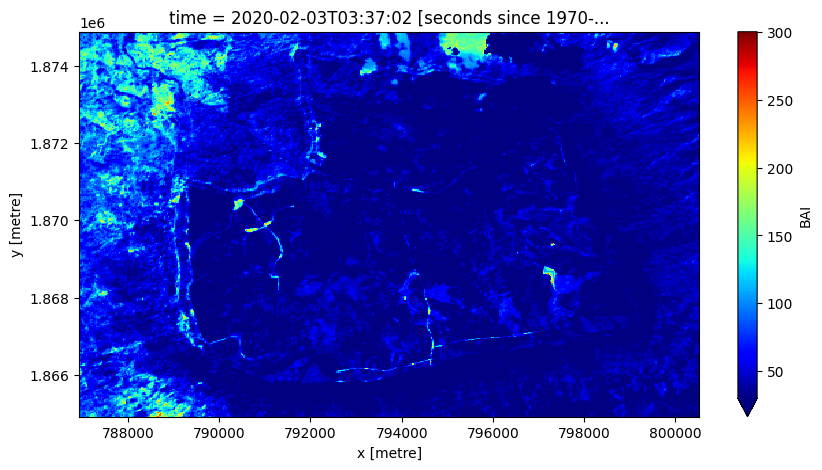

In [13]:
# Plot the results 
ds_time.BAI.plot(vmin=30, vmax=300, cmap='jet', figsize=(10, 5))

#### After

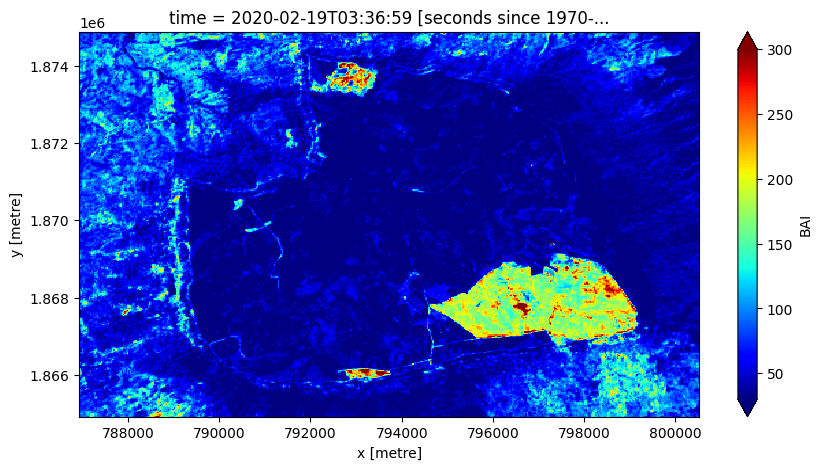

In [14]:
# Plot the results
ds_BAI.BAI.plot(vmin=30, vmax=300, cmap='jet', figsize=(10, 5))